# **Book Recommender System**

## Data Preprocessing

In [102]:
# importing all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# importing all datasets

books = pd.read_csv('Datasets/Books.csv')
ratings = pd.read_csv('Datasets/Ratings.csv')
users = pd.read_csv('Datasets/Users.csv')

C:\Users\masan\AppData\Local\Temp\ipykernel_8132\4169897572.py:3: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Datasets/Books.csv')


In [3]:
# checking first five entries in books dataset

books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
# checking for null and duplicate values

print('Shape of dataset is:',books.shape)
print('---------------------------------')
print(books.isnull().sum())
print('---------------------------------')
print('Duplicate values are: ',books.duplicated().sum())

Shape of dataset is: (271360, 8)
---------------------------------
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
---------------------------------
Duplicate values are:  0


In [5]:
# info of dataset

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


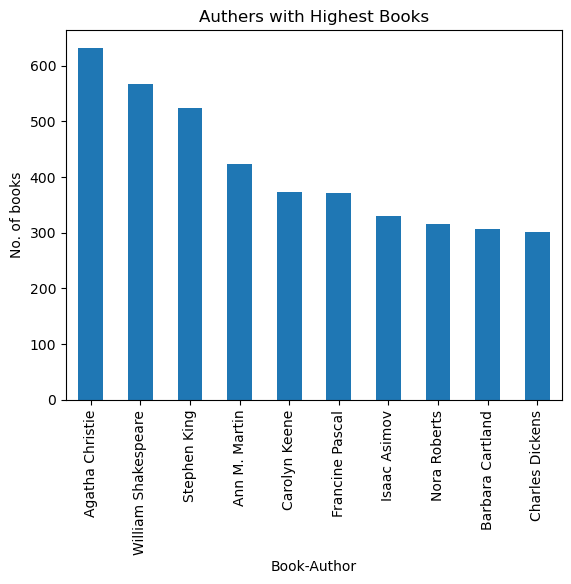

In [6]:
# top 10 Authors with highest numbers of books 

books['Book-Author'].value_counts()[:10].plot(kind='bar')
plt.title('Authers with Highest Books')
plt.ylabel('No. of books')
plt.show()

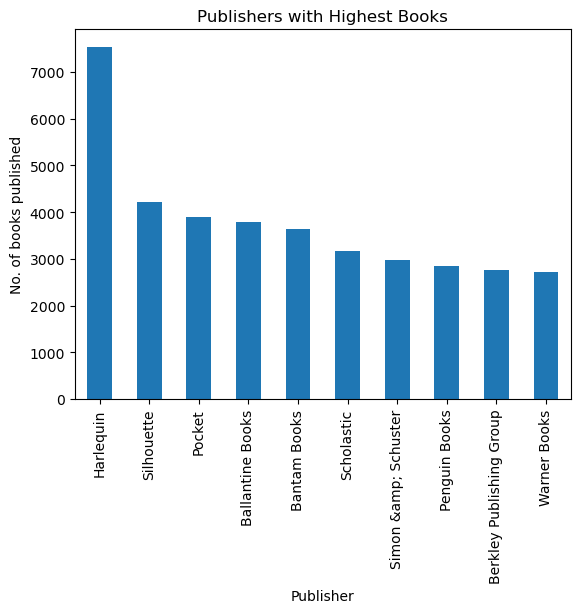

In [7]:
# top 10 publishers with highest numbers of books published

books['Publisher'].value_counts()[:10].plot(kind='bar')
plt.title('Publishers with Highest Books')
plt.ylabel('No. of books published')
plt.show()

In [8]:
# checking first five ratings values

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [9]:
# checking for null and duplicate values

print('Shape of dataset is:', ratings.shape)
print('------------------------------------')
print(ratings.isnull().sum())
print('------------------------------------')
print('Duplicate values are: ',ratings.duplicated().sum())

Shape of dataset is: (1149780, 3)
------------------------------------
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64
------------------------------------
Duplicate values are:  0


In [10]:
# checking info

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
# head of dataset

users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [12]:
# checking for null and duplicate values

print('Shape of dataset is:',users.shape)
print('---------------------------------')
print(users.isnull().sum())
print('---------------------------------')
print('Duplicate values are: ',users.duplicated().sum())

Shape of dataset is: (278858, 3)
---------------------------------
User-ID          0
Location         0
Age         110762
dtype: int64
---------------------------------


Duplicate values are:  0


In [13]:
# info of dataset

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


## Popularity Based Recommender System

In [31]:
# merging two columns

ratings_with_names = ratings.merge(books, on='ISBN')

In [32]:
# Counting numbers of ratings for each book

num_rating_df = ratings_with_names.groupby('Book-Title')['Book-Rating'].count().reset_index()
num_rating_df.rename(columns={'Book-Rating': 'Num-Ratings'}, inplace=True)

In [45]:
# Calculating average rating for each book 

avg_rating_df = ratings_with_names.groupby('Book-Title')['Book-Rating'].mean().reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'Avg-Ratings'}, inplace=True)
avg_rating_df['Avg-Ratings'] = avg_rating_df['Avg-Ratings'].round(2)

In [41]:
# First 50 books with highest average ratings

popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popular_df = popular_df[popular_df['Num-Ratings']>=250].sort_values('Avg-Ratings', ascending=False).reset_index(drop=True).head(50)

In [46]:
# merging two dataframes

popular_df = popular_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'Num-Ratings', 'Avg-Ratings']]

## Colaberative Filtering Based Recommender System

In [49]:
# we have two datasets books and ratings 
# we will create a dataset where columns will be users and rows will be books 
# we will consider only users who has rated at least 200 books and only books which has at least 50 ratings

In [86]:
x = ratings_with_names.groupby('User-ID')['Book-Rating'].count() > 200
users_rated = x[x].index

In [93]:
filtered_ratings = ratings_with_names[ratings_with_names['User-ID'].isin(users_rated)]

(474007, 10)

In [97]:
y = filtered_ratings.groupby('Book-Title').count()['Book-Rating']>=50
famous_books = y[y].index

In [98]:
final_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]
print(final_ratings.shape)
final_ratings.head()

(58586, 10)


,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
63,278418,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
65,3363,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
66,7158,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
69,11676,0446520802,10,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
74,23768,0446520802,6,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [99]:
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')
pt.shape

(706, 810)

In [100]:
pt.fillna(0, inplace=True)

In [101]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
similarity_score = cosine_similarity(pt)

In [129]:
def recommend(book):
    index = np.where(pt.index == book)[0][0]
    similarity_items = sorted(list(enumerate(similarity_score[index])), key= lambda x:x[1], reverse=True)[1:6]

    for i in similarity_items:
        print(pt.index[i[0]])
    

In [130]:
recommend('1984')

Animal Farm
The Handmaid's Tale
Brave New World
The Vampire Lestat (Vampire Chronicles, Book II)
The Hours : A Novel
